# IIB40303 - PROGRAMMING FOR DATA ANALYTIC
### MUHAMMAD HAZIQ BIN ROZMAN (52224121174)
### MUHAMMAD AFIQ BIN SALIHAN (52224121123)

# Crop Recommendation Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
df = pd.read_csv('data/Crop_Recommendation.csv')

# 1. Data Preparation

## 1.1 Data Understanding

In [3]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [5]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [6]:
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

## 1.2 Data Cleaning

In [7]:
# Check for Missing Values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [8]:
# Check for Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
# Ensure all data types are correct
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object

# 2. Exploratory Data Analysis 

              count        mean        std        min        25%        50%  \
Nitrogen     2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
Phosphorus   2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
Potassium    2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
Temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
Humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
pH_Value     2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
Rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
Nitrogen      84.250000  140.000000  
Phosphorus    68.000000  145.000000  
Potassium     49.000000  205.000000  
Temperature   28.561654   43.675493  
Humidity      89.948771   99.981876  
pH_Value       6.923643    9.935091  
Rainfall     124.267508  298.560117  


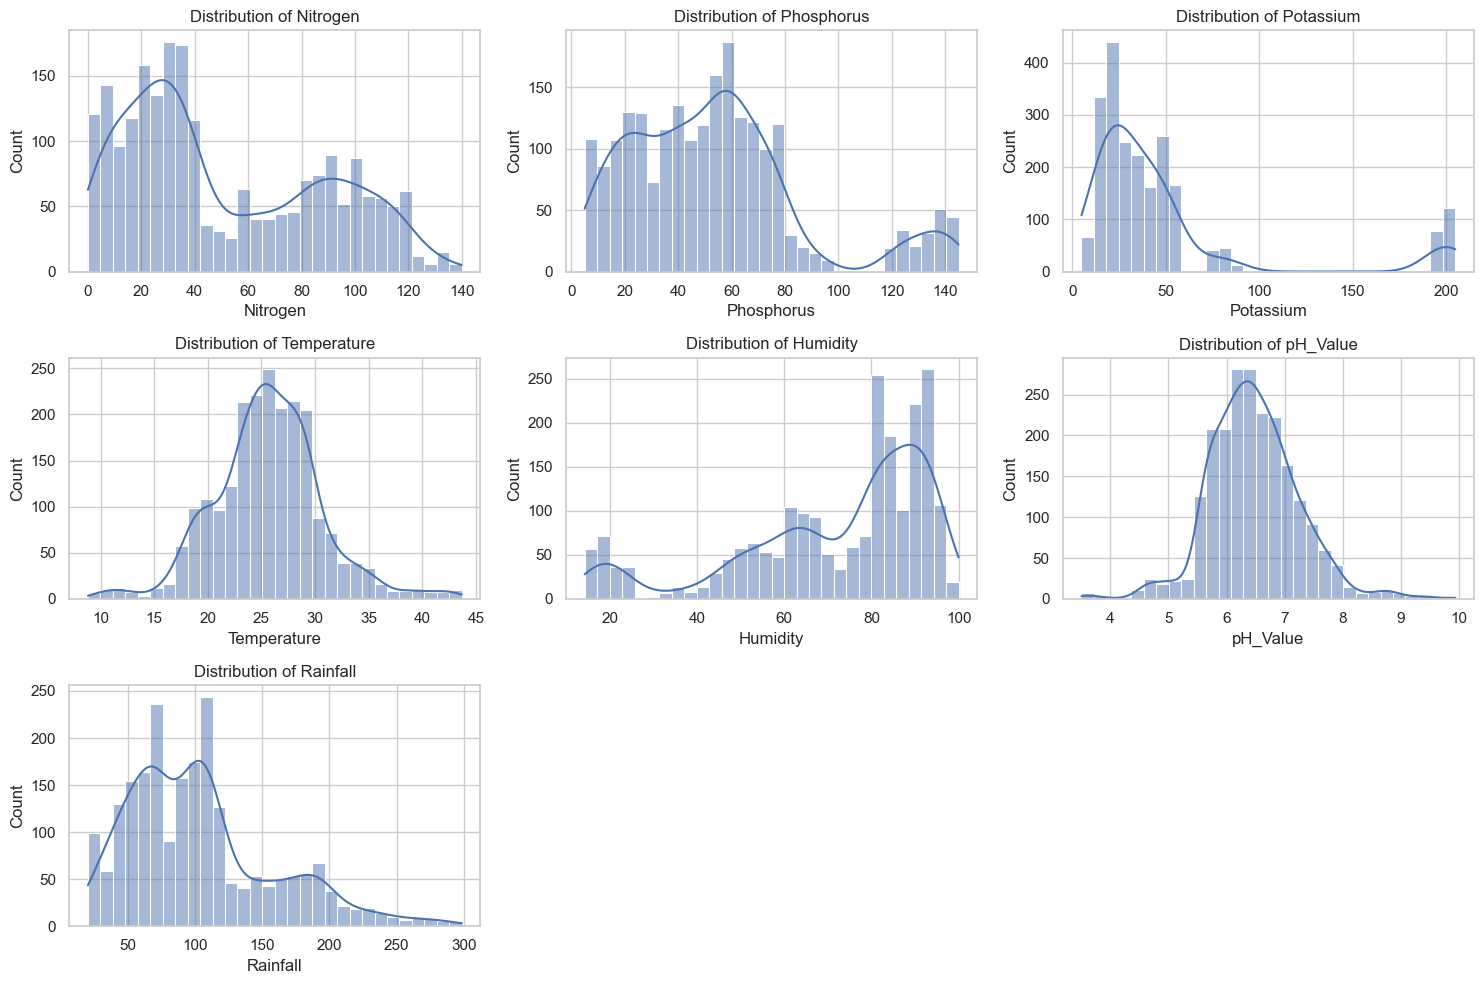

In [10]:
# List of numeric columns
numeric_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

# Summary statistics for numeric columns
summary_stats = df[numeric_columns].describe().T
print(summary_stats)

# Creating histograms for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64


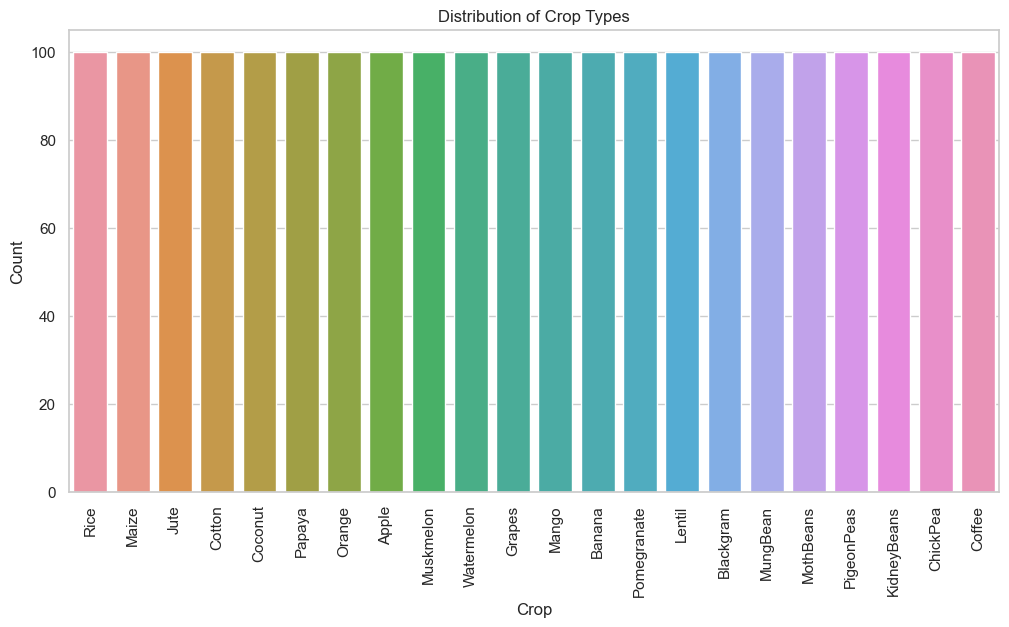

In [11]:
# Summary statistics for the Crop column
crop_summary = df['Crop'].value_counts()
print(crop_summary)

# Creating a bar plot for the Crop column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Crop', order=crop_summary.index)
plt.xticks(rotation=90)
plt.title('Distribution of Crop Types')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

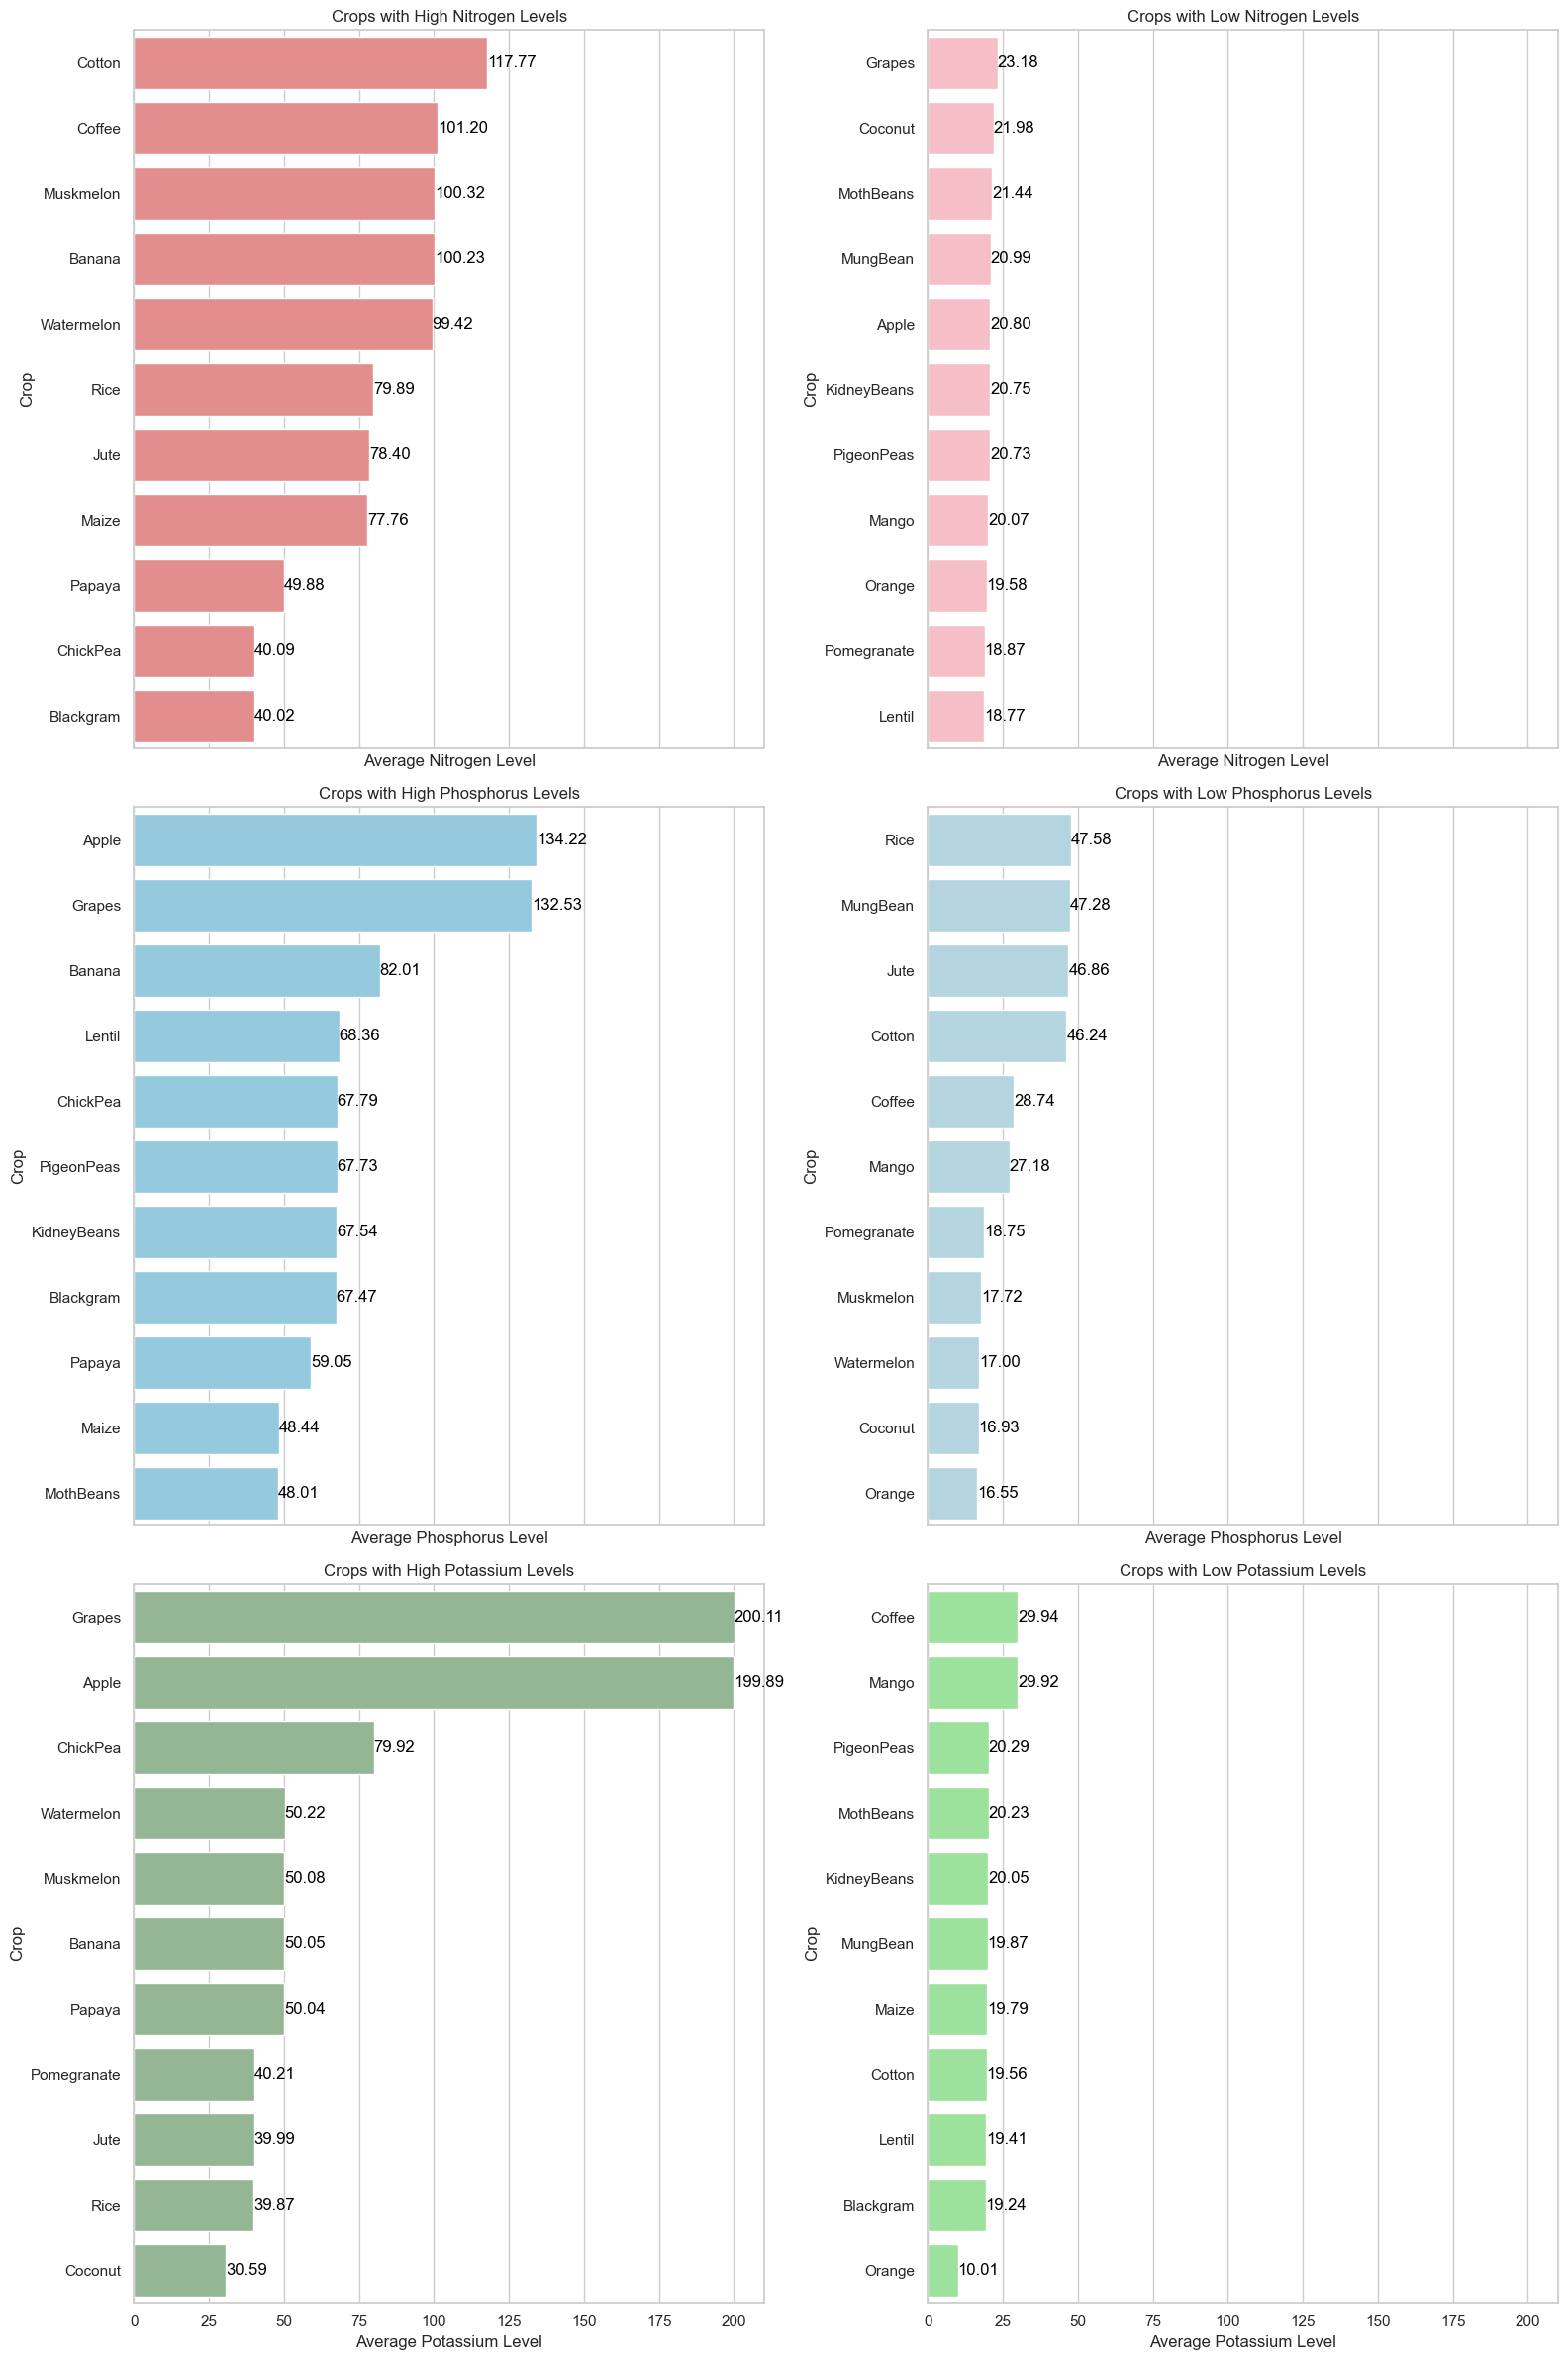

In [12]:
# Calculate the average levels for each nutrient for each crop
avg_nitrogen_per_crop = df.groupby('Crop')['Nitrogen'].mean().sort_values(ascending=False)
avg_phosphorus_per_crop = df.groupby('Crop')['Phosphorus'].mean().sort_values(ascending=False)
avg_potassium_per_crop = df.groupby('Crop')['Potassium'].mean().sort_values(ascending=False)

# Select top and bottom crops for each nutrient
top_nitrogen = avg_nitrogen_per_crop.head(11)
bottom_nitrogen = avg_nitrogen_per_crop.tail(11)
top_phosphorus = avg_phosphorus_per_crop.head(11)
bottom_phosphorus = avg_phosphorus_per_crop.tail(11)
top_potassium = avg_potassium_per_crop.head(11)
bottom_potassium = avg_potassium_per_crop.tail(11)

# Plot the average levels for each nutrient for top and bottom crops
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 24), sharex=True)

# Colors for each nutrient
nitrogen_colors = ['lightcoral', 'lightpink']
phosphorus_colors = ['skyblue', 'lightblue']
potassium_colors = ['darkseagreen', 'lightgreen']

# Plot nitrogen
sns.barplot(x=top_nitrogen.values, y=top_nitrogen.index, ax=axes[0, 0], color=nitrogen_colors[0])
axes[0, 0].set_title('Crops with High Nitrogen Levels')
axes[0, 0].set_xlabel('Average Nitrogen Level')
axes[0, 0].set_ylabel('Crop')
for index, value in enumerate(top_nitrogen.values):
    axes[0, 0].text(value, index, f'{value:.2f}', color='black', ha='left', va='center')
sns.barplot(x=bottom_nitrogen.values, y=bottom_nitrogen.index, ax=axes[0, 1], color=nitrogen_colors[1])
axes[0, 1].set_title('Crops with Low Nitrogen Levels')
axes[0, 1].set_xlabel('Average Nitrogen Level')
axes[0, 1].set_ylabel('Crop')
for index, value in enumerate(bottom_nitrogen.values):
    axes[0, 1].text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

# Plot phosphorus
sns.barplot(x=top_phosphorus.values, y=top_phosphorus.index, ax=axes[1, 0], color=phosphorus_colors[0])
axes[1, 0].set_title('Crops with High Phosphorus Levels')
axes[1, 0].set_xlabel('Average Phosphorus Level')
axes[1, 0].set_ylabel('Crop')
for index, value in enumerate(top_phosphorus.values):
    axes[1, 0].text(value, index, f'{value:.2f}', color='black', ha='left', va='center')
sns.barplot(x=bottom_phosphorus.values, y=bottom_phosphorus.index, ax=axes[1, 1], color=phosphorus_colors[1])
axes[1, 1].set_title('Crops with Low Phosphorus Levels')
axes[1, 1].set_xlabel('Average Phosphorus Level')
axes[1, 1].set_ylabel('Crop')
for index, value in enumerate(bottom_phosphorus.values):
    axes[1, 1].text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

# Plot potassium
sns.barplot(x=top_potassium.values, y=top_potassium.index, ax=axes[2, 0], color=potassium_colors[0])
axes[2, 0].set_title('Crops with High Potassium Levels')
axes[2, 0].set_xlabel('Average Potassium Level')
axes[2, 0].set_ylabel('Crop')
for index, value in enumerate(top_potassium.values):
    axes[2, 0].text(value, index, f'{value:.2f}', color='black', ha='left', va='center')
sns.barplot(x=bottom_potassium.values, y=bottom_potassium.index, ax=axes[2, 1], color=potassium_colors[1])
axes[2, 1].set_title('Crops with Low Potassium Levels')
axes[2, 1].set_xlabel('Average Potassium Level')
axes[2, 1].set_ylabel('Crop')
for index, value in enumerate(bottom_potassium.values):
    axes[2, 1].text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

# Adjust layout
plt.tight_layout()
plt.show()


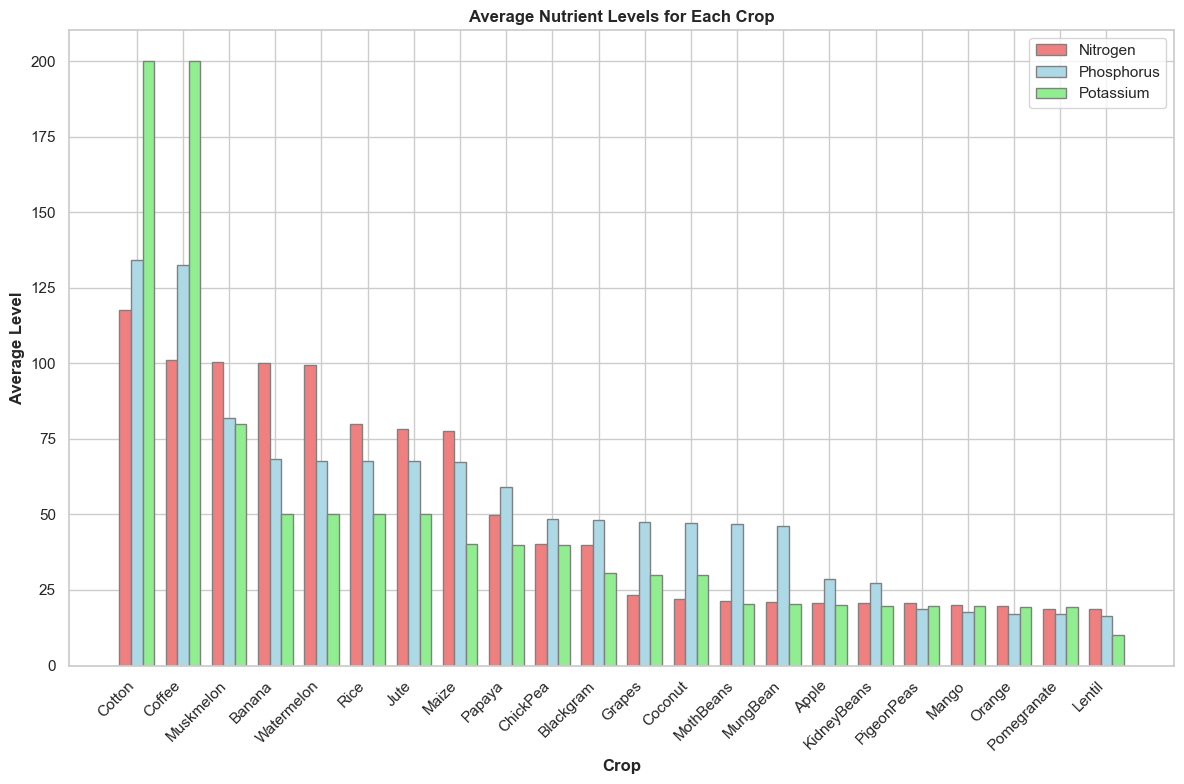

In [13]:
# Calculate the average levels for each nutrient for each crop
avg_nitrogen_per_crop = df.groupby('Crop')['Nitrogen'].mean().sort_values(ascending=False)
avg_phosphorus_per_crop = df.groupby('Crop')['Phosphorus'].mean().sort_values(ascending=False)
avg_potassium_per_crop = df.groupby('Crop')['Potassium'].mean().sort_values(ascending=False)

# Get the list of crops
crops = avg_nitrogen_per_crop.index

# Set the width of the bars
bar_width = 0.25

# Define the positions for the bars
r1 = np.arange(len(crops))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the average levels for each nutrient for all crops
plt.figure(figsize=(12, 8))

# Plot nitrogen
plt.bar(r1, avg_nitrogen_per_crop, color='lightcoral', width=bar_width, edgecolor='grey', label='Nitrogen')

# Plot phosphorus
plt.bar(r2, avg_phosphorus_per_crop, color='lightblue', width=bar_width, edgecolor='grey', label='Phosphorus')

# Plot potassium
plt.bar(r3, avg_potassium_per_crop, color='lightgreen', width=bar_width, edgecolor='grey', label='Potassium')

# Add xticks on the middle of the group bars
plt.xlabel('Crop', fontweight='bold')
plt.ylabel('Average Level', fontweight='bold')
plt.title('Average Nutrient Levels for Each Crop', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(crops))], crops, rotation=45, ha='right')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()

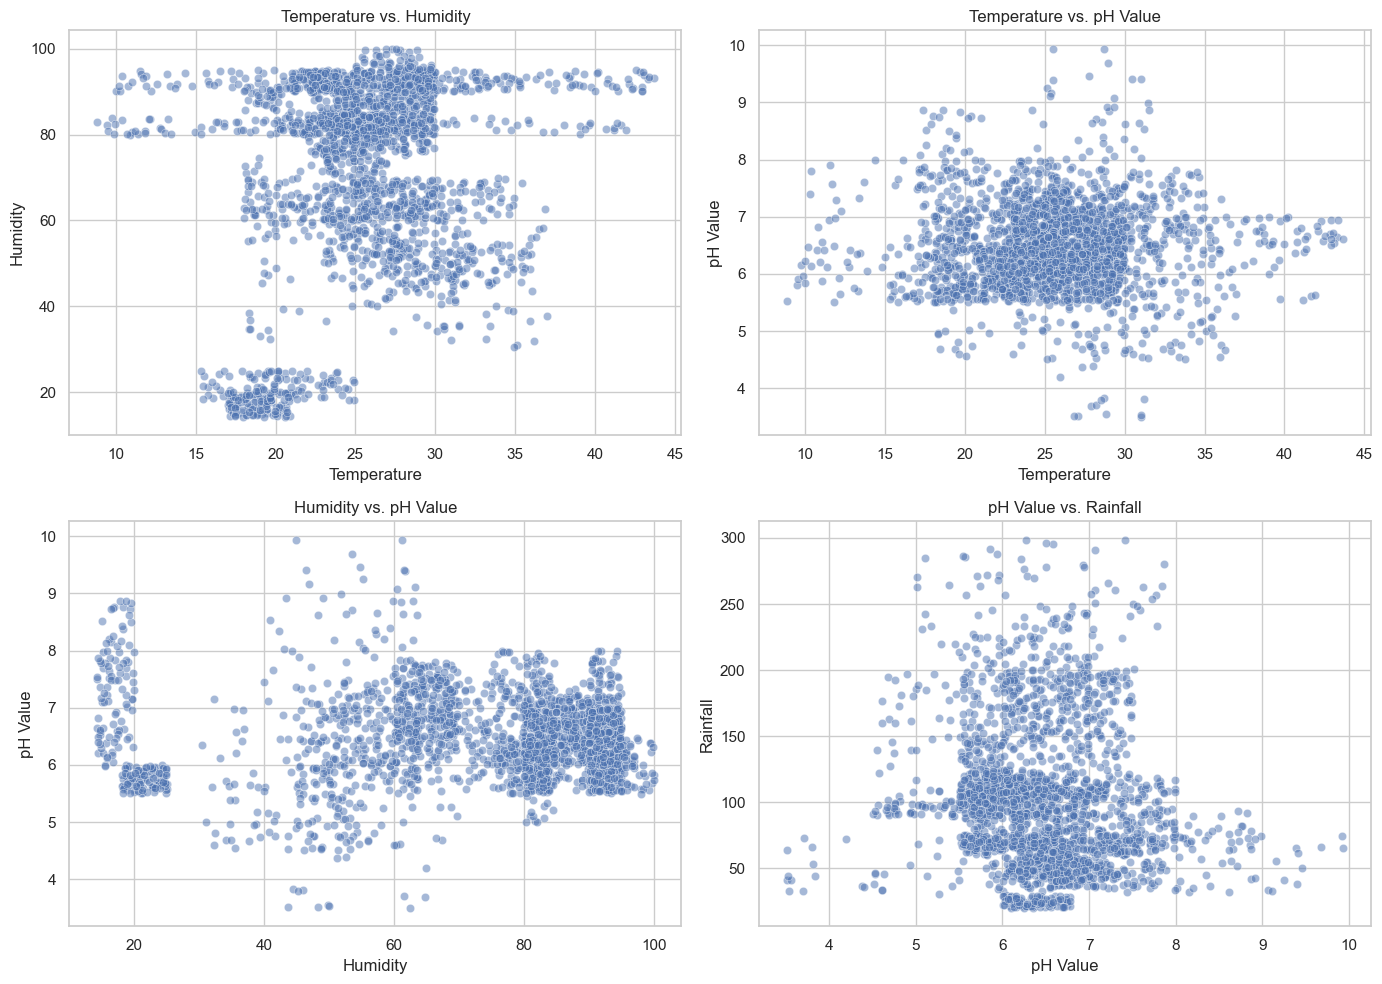

In [14]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot Temperature vs. Humidity
sns.scatterplot(x='Temperature', y='Humidity', data=df, ax=axes[0, 0], alpha=0.5)
axes[0, 0].set_title('Temperature vs. Humidity')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Humidity')

# Plot Temperature vs. pH Value
sns.scatterplot(x='Temperature', y='pH_Value', data=df, ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title('Temperature vs. pH Value')
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('pH Value')

# Plot Humidity vs. pH Value
sns.scatterplot(x='Humidity', y='pH_Value', data=df, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Humidity vs. pH Value')
axes[1, 0].set_xlabel('Humidity')
axes[1, 0].set_ylabel('pH Value')

# Plot pH Value vs. Rainfall
sns.scatterplot(x='pH_Value', y='Rainfall', data=df, ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('pH Value vs. Rainfall')
axes[1, 1].set_xlabel('pH Value')
axes[1, 1].set_ylabel('Rainfall')

# Adjust layout
plt.tight_layout()
plt.show()


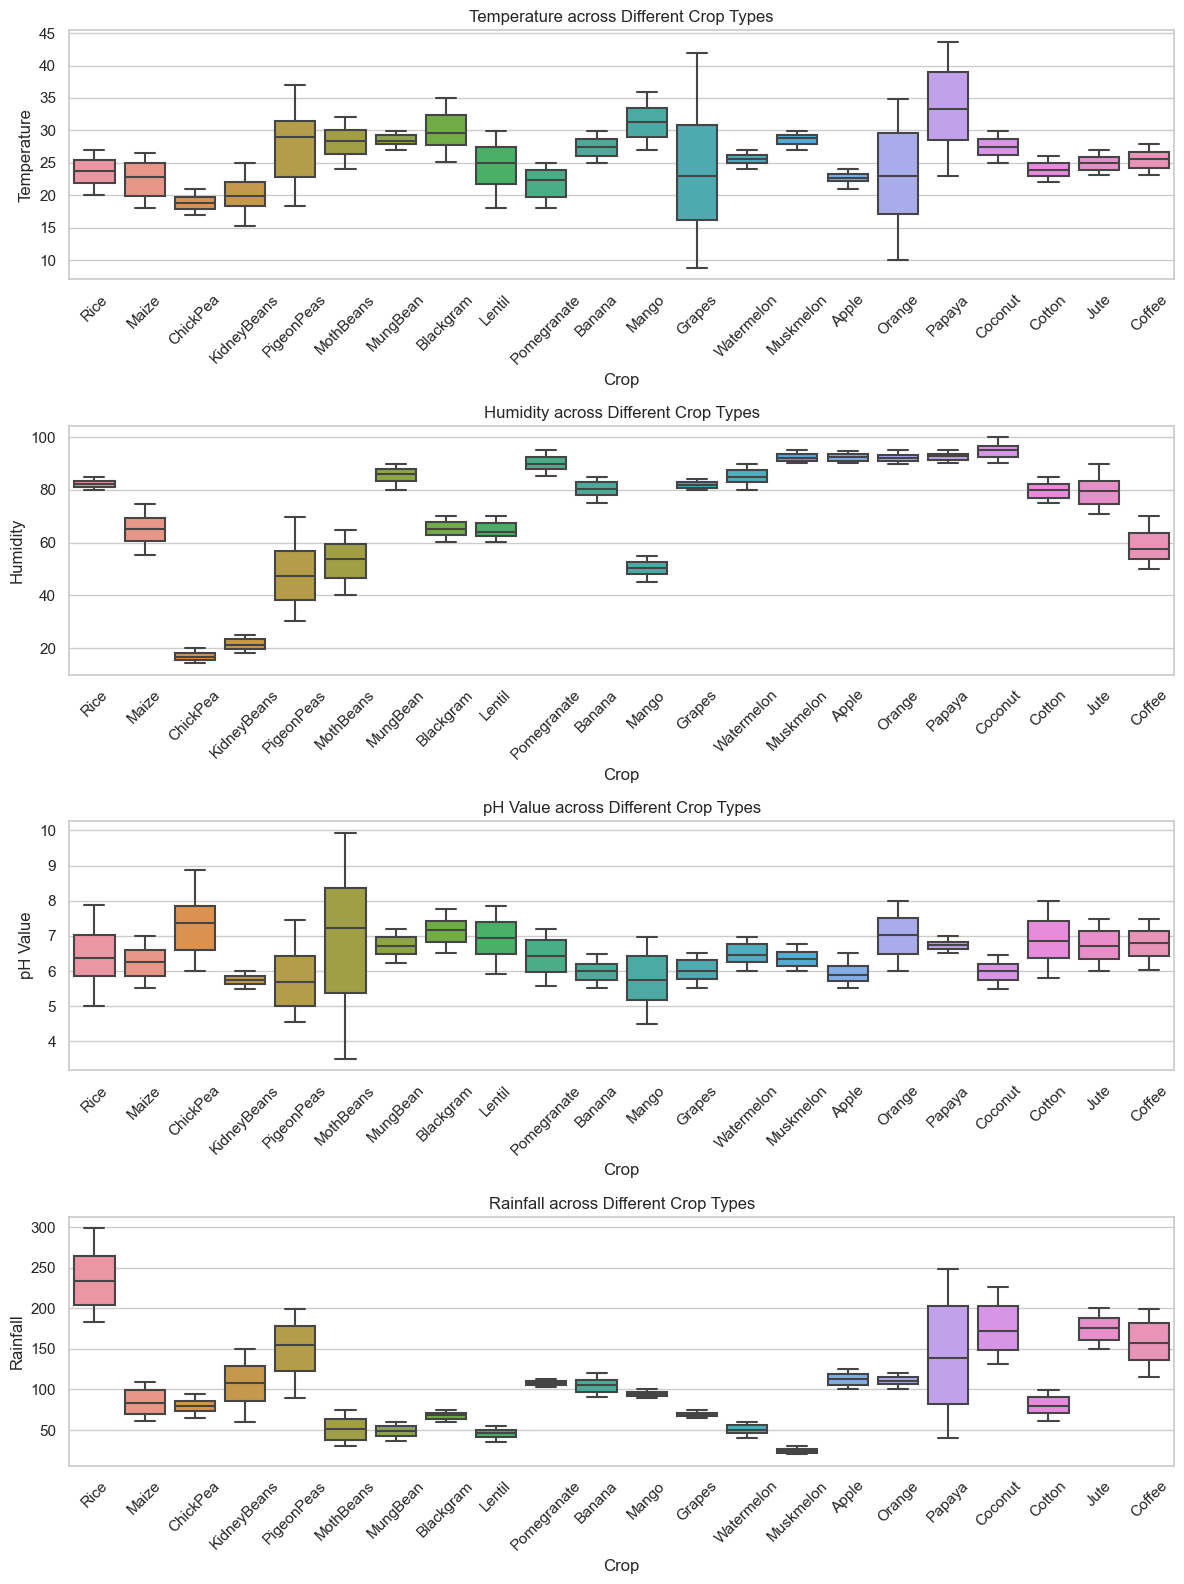

In [15]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

# Plot Temperature across different crop types
sns.boxplot(x='Crop', y='Temperature', data=df, ax=axes[0])
axes[0].set_title('Temperature across Different Crop Types')
axes[0].set_ylabel('Temperature')

# Plot Humidity across different crop types
sns.boxplot(x='Crop', y='Humidity', data=df, ax=axes[1])
axes[1].set_title('Humidity across Different Crop Types')
axes[1].set_ylabel('Humidity')

# Plot pH Value across different crop types
sns.boxplot(x='Crop', y='pH_Value', data=df, ax=axes[2])
axes[2].set_title('pH Value across Different Crop Types')
axes[2].set_ylabel('pH Value')

# Plot Rainfall across different crop types
sns.boxplot(x='Crop', y='Rainfall', data=df, ax=axes[3])
axes[3].set_title('Rainfall across Different Crop Types')
axes[3].set_ylabel('Rainfall')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# 3. Findings and Insights

## 3.1 Key Observations

### 1. Distribution of Nutrients:

- Nitrogen: The average nitrogen level is 50.55, with a wide range of values from 0 to 140. The histogram indicates that nitrogen levels are skewed towards the lower end.
- Phosphorus: The average phosphorus level is 53.36, with values ranging from 5 to 145. The distribution shows a similar skewness as nitrogen.
- Potassium: Potassium levels have a mean of 48.15 and exhibit significant variation, ranging from 5 to 205.

### 2. Environmental Conditions:

- Temperature: The average temperature is 25.62°C, with most values falling between 20°C and 30°C.
- Humidity: The mean humidity is 71.48%, but values vary widely, indicating diverse climatic conditions in the dataset.
- pH Value: The average pH is 6.47, with most values between 6 and 7, suggesting slightly acidic to neutral soil conditions.
- Rainfall: The average rainfall is 103.46 mm, with a broad range from 20 to nearly 300 mm, indicating varied water availability.

### 3. Crop Distribution:

- Each crop type is evenly represented with 100 instances. This balanced dataset can help in building robust predictive models without bias towards any specific crop.

### 4. Nutrient Requirements by Crop:

- Some crops like Rice and Maize require higher nitrogen levels, while others like ChickPea and Coffee need lower levels.
Similar trends are observed for phosphorus and potassium levels across different crops.

## 3.2 Insights

### 1. Nutrient Management:

- Understanding the nutrient requirements of different crops can help in optimizing fertilizer use, leading to better crop yields and sustainable farming practices.
- Crops with high nutrient demands (e.g., Rice, Maize) should be provided with more nitrogen and phosphorus, while those with lower demands (e.g., ChickPea, Coffee) can be managed with less.

### 2. Climatic Suitability:

- The dataset's temperature, humidity, pH, and rainfall information can help in identifying suitable crops for specific regions based on their climatic con- ditions.
- For instance, crops requiring high humidity (e.g., Rice) should be grown in areas with consistent moisture levels, while those tolerant to lower humidity (e.g., Lentil) can be grown in drier regions.

### 3. Crop Recommendations:

- Using the nutrient and environmental data, recommendations can be made for crop rotation and intercropping strategies that optimize soil health and productivity.

## 3.3 Predictive Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode the 'Crop' column
label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])

# Separate features and target variable
X = df.drop('Crop', axis=1)
y = df['Crop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Accuracy: 0.9863636363636363
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00     

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.98636364 0.98636364 0.99545455 0.99090909 0.99090909 0.99090909
 0.99545455 0.99090909 0.98181818 0.99545455]
Mean cross-validation score: 0.9904545454545456


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score:  0.9863636363636363


In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Random Forest Accuracy: 0.9931818181818182
Gradient Boosting Accuracy: 0.9818181818181818


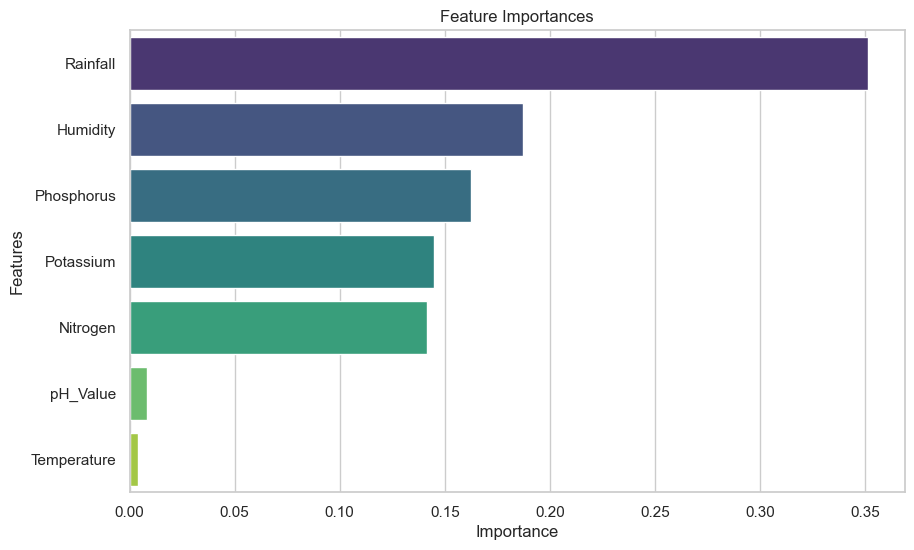

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


### 1. Model Performance

#### Decision Tree Classifier

- Accuracy: 98.64%
- Cross-validation scores: Mean score of 99.05%
- Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

#### Ensemble Methods

- Random Forest Accuracy: 99.32%
- Gradient Boosting Accuracy: 98.18%

The high accuracy values indicate that both the Decision Tree and ensemble methods (Random Forest and Gradient Boosting) are performing exceptionally well on the dataset. Random Forest, in particular, slightly outperforms the other models.

### 2. Classification Report

##### The classification report shows precision, recall, and F1-scores for each crop category. Here are a few key takeaways:

- Most classes have precision, recall, and F1-scores close to or equal to 1.0, indicating very high performance across nearly all crops.
- Class 20 (crop 20) has a slightly lower recall (0.89) and F1-score (0.92), suggesting it might be more challenging to classify accurately compared to other crops.

### 3. Feature Importance

##### The feature importances provide insights into which factors are most influential in predicting crop suitability:

- Rainfall (35.11%): The most critical factor, indicating crops are highly sensitive to rainfall levels.
- Humidity (18.72%): The second most important feature, emphasizing the significance of moisture in the air.
- Phosphorus (16.25%), Potassium (14.51%), and Nitrogen (14.17%): These nutrients are crucial for plant growth, indicating their levels significantly affect crop recommendations.
- pH Value (0.82%) and Temperature (0.42%): These factors are less influential compared to others but still play a role in crop suitability.

### 4. Predictive Insights and Recommendations

##### Based on the model's performance and feature importance, the following predictions and recommendations can be made:

#### 1. Crops for High Rainfall Areas:

- Crops requiring substantial rainfall will be favored in regions with high precipitation. For instance, crops like Rice are likely to thrive in such conditions.

#### 2. Humidity-sensitive Crops:

- High humidity levels are crucial for certain crops. For example, crops like Coconut and Cardamom, which require high humidity, will be recommended in moist regions.

#### 3. Nutrient Management:

- Phosphorus, Potassium, and Nitrogen levels are pivotal. Ensuring adequate levels of these nutrients will optimize crop yields. For example, crops like Maize (requiring high Nitrogen) should be grown in nitrogen-rich soils.

#### 4. Less Influential Factors:

- While pH Value and Temperature are less critical, they should not be ignored. Slight adjustments in soil pH and managing temperature conditions can still benefit specific crops.